In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('data/ChatGPT生成文本检测器公开数据-更新/train.csv')
test_data = pd.read_csv('data/ChatGPT生成文本检测器公开数据-更新/test.csv')

In [3]:
# 对输入的内容进行处理
train_data['content'] = train_data['content'].apply(lambda x: x[1:-1].strip().replace('\n', ' \n '))
test_data['content'] = test_data['content'].apply(lambda x: x[1:-1].strip().replace('\n', ' \n '))

train_data['content'] = train_data['content'].apply(lambda x: x.split(' '))
test_data['content'] = test_data['content'].apply(lambda x: x.split(' '))

train_data['content'] = train_data['content'].apply(lambda x: [i for i in x if i != ''])
test_data['content'] = test_data['content'].apply(lambda x: [i for i in x if i != ''])



[('\n', 195874), ('5212', 173863), ('3125', 116815), ('1759', 72557), ('123', 69893), ('0', 61434), ('139', 58299), ('205', 43617), ('2113', 35667), ('998', 28072), ('148', 24948), ('2177', 24570), ('266', 23772), ('3181', 19128), ('167', 18568), ('146', 18402), ('236', 18057), ('534', 17929), ('2214', 17202), ('1328', 15754)]
[('\n', 139897), ('5212', 124418), ('3125', 83609), ('1759', 51646), ('123', 50293), ('0', 43876), ('139', 41650), ('205', 31083), ('2113', 25219), ('998', 20127), ('148', 18018), ('2177', 17275), ('266', 17208), ('3181', 13529), ('146', 13415), ('167', 13226), ('236', 13071), ('534', 12667), ('2214', 12403), ('1328', 11340)]


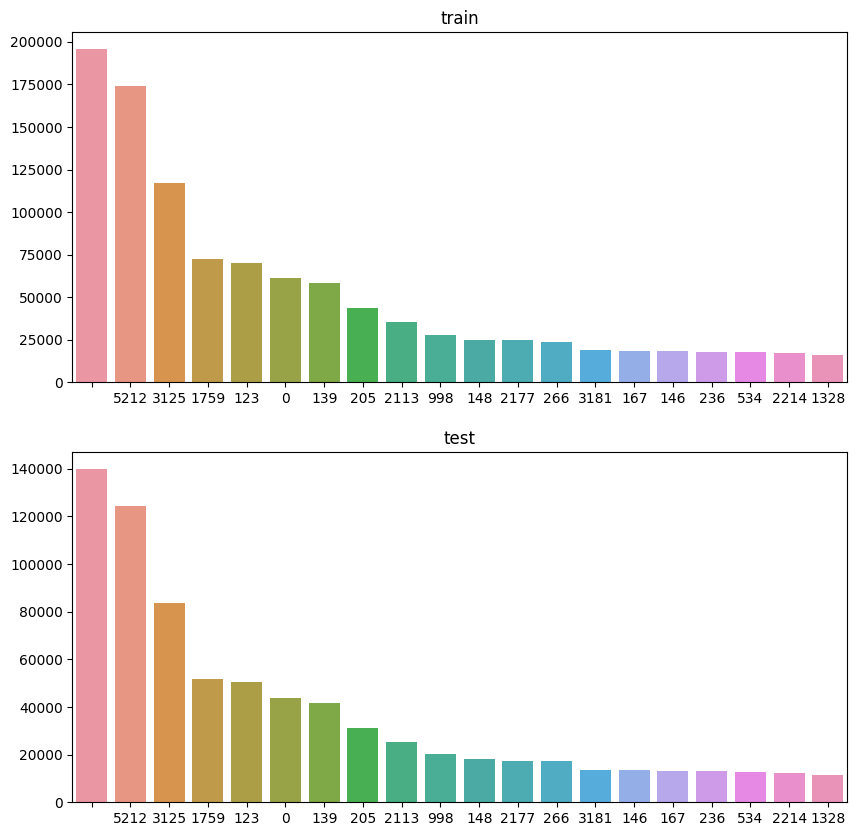

In [4]:
# 统计字符出现的频次并输出前10个最常见的字符
from collections import Counter

def word_count_plot(df, ax, title_name=''):
    counter = Counter()
    for content in df['content']:
        counter.update(content)
    print(counter.most_common(20))
    x, y = zip(*counter.most_common(20))
    sns.barplot(x=list(x), y=list(y), ax=ax)
    ax.set_title(title_name)

fig, (ax_train, ax_test) = plt.subplots(2, 1, figsize=(10, 10))

word_count_plot(train_data, ax_train, 'train')
word_count_plot(test_data, ax_test, 'test')

标签分布

([<matplotlib.patches.Wedge at 0x7f5d26f1f2b0>,
 [Text(-0.5134133958006168, -0.9728343564104217, '0'),
  Text(0.513413350258953, 0.9728343804450365, '1')],
 [Text(-0.2800436704367001, -0.5306369216784118, '84.5%'),
  Text(0.2800436455957925, 0.5306369347882016, '15.5%')])

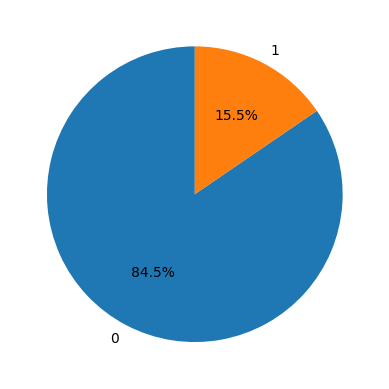

In [5]:
size, label = train_data['label'].value_counts().values, train_data['label'].value_counts().index
plt.pie(size, labels=label, autopct='%1.1f%%', startangle=90)


不同标签的词频分布

[('\n', 165669), ('5212', 151734), ('3125', 97697), ('1759', 60633), ('123', 56014), ('0', 52489), ('139', 52032), ('205', 39162), ('2113', 30653), ('998', 23765), ('148', 21835), ('2177', 21434), ('3181', 17503), ('146', 17158), ('167', 16081), ('266', 15773), ('2214', 15401), ('1328', 14533), ('236', 14310), ('534', 13765)]
[('\n', 30205), ('5212', 22129), ('3125', 19118), ('123', 13879), ('1759', 11924), ('0', 8945), ('266', 7999), ('778', 7746), ('139', 6267), ('2113', 5014), ('205', 4455), ('998', 4307), ('534', 4164), ('236', 3747), ('286', 3147), ('2177', 3136), ('148', 3113), ('694', 3100), ('3799', 3100), ('1715', 3000)]


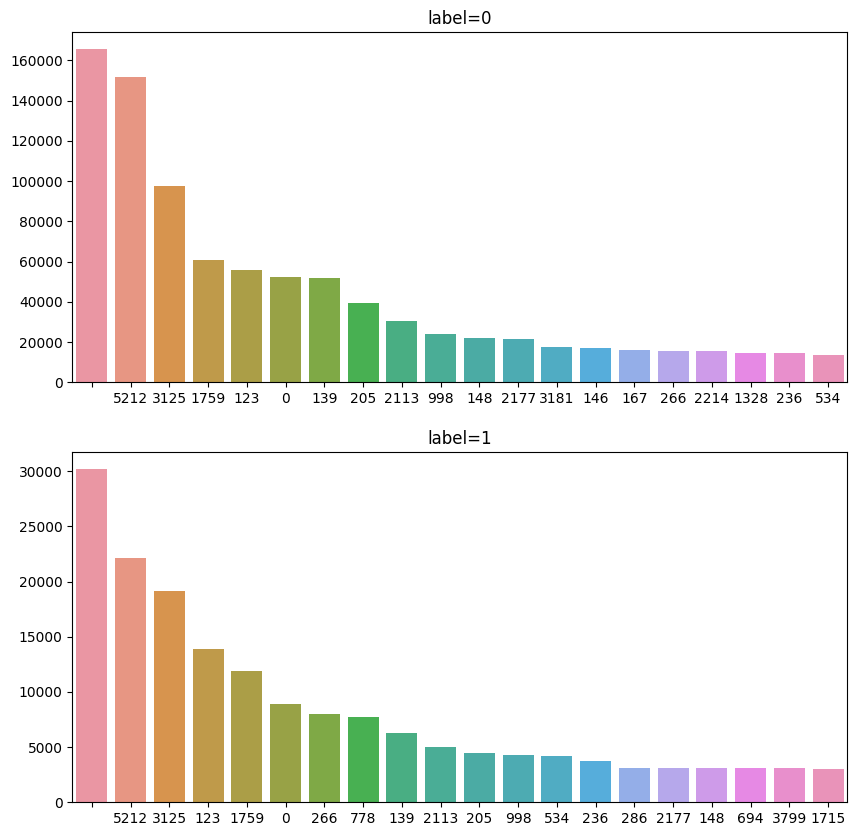

In [9]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10, 10))
word_count_plot(train_data[train_data['label'] == 0], ax0, 'label=0')
word_count_plot(train_data[train_data['label'] == 1], ax1, 'label=1')
